Name : Gajaanan S.
Index No : 190185D

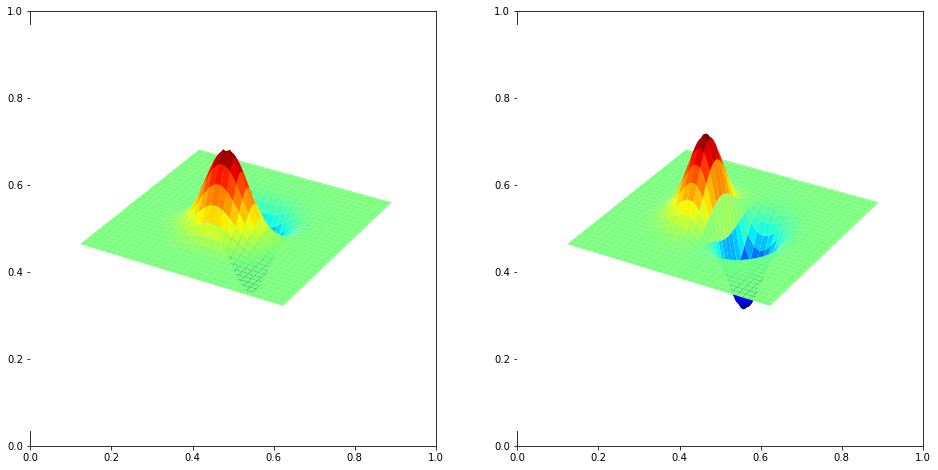

In [15]:
#Q1
import cv2 as cv
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig, ax = plt.subplots (1,2, figsize=(16,8))
ax1 = fig.add_subplot (121, projection='3d')
ax2= fig.add_subplot (122, projection='3d')
delta = 0.1
xx, YY = np.meshgrid(np.arange(-5, 5 + delta, delta),np.arange(-5, 5 + delta, delta))
sigma = 1

g= np.exp(-(xx**2 + YY**2)/(2*sigma**2)) 
g /= np.sum(g)
sobel_v = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)
g_x= cv.filter2D(g, -1, sobel_v) 
sobel_h= np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32) 
g_y = cv.filter2D(g, -1, sobel_h)
surfı = ax1.plot_surface(xx, YY, g_x, cmap=cm.jet, linewidth=0, antialiased=True) 
surf2 = ax2.plot_surface(xx, YY, g_y, cmap=cm.jet, linewidth=0, antialiased=True)               
ax1.axis('off')
ax2.axis('off')
plt.show()

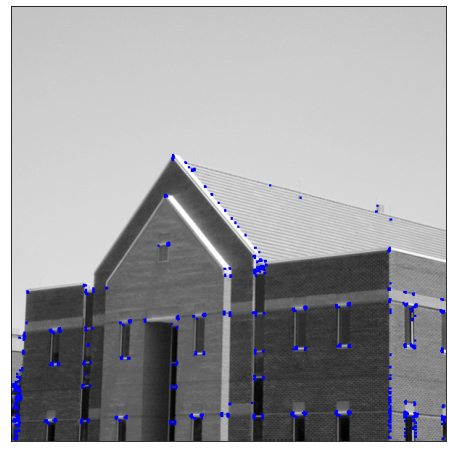

In [12]:
#Q2
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

filename = 'building.tif'
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
dst = cv.dilate(dst,None)
img[dst>0.01*dst.max()]=[0,0,255]
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.xticks([]), plt.yticks([])
plt.show()

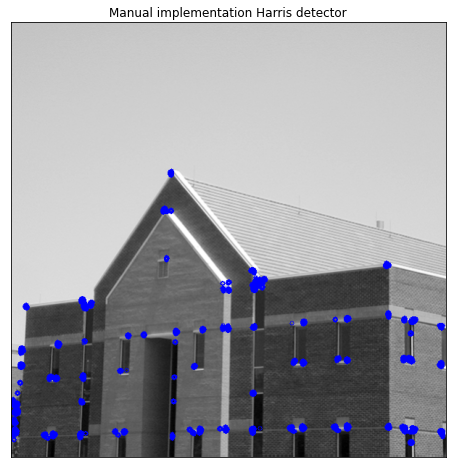

In [17]:
#Q3
import cv2
import numpy as np
from matplotlib import pyplot as plt


def my_harris(img_dir,window_size,k,threshold):

    img = cv2.imread(img_dir)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_gaussian = cv2.GaussianBlur(gray,(3,3),0)    
    height = img.shape[0]  
    width = img.shape[1]   
    matrix_R = np.zeros((height,width))
    
    dx = cv2.Sobel(img_gaussian, cv2.CV_64F, 1, 0, ksize=3)
    dy = cv2.Sobel(img_gaussian, cv2.CV_64F, 0, 1, ksize=3)

    dx2=np.square(dx)
    dy2=np.square(dy)
    dxy=dx*dy

    offset = int( window_size / 2 )
   
    for y in range(offset, height-offset):
        for x in range(offset, width-offset):
            Sx2 = np.sum(dx2[y-offset:y+1+offset, x-offset:x+1+offset])
            Sy2 = np.sum(dy2[y-offset:y+1+offset, x-offset:x+1+offset])
            Sxy = np.sum(dxy[y-offset:y+1+offset, x-offset:x+1+offset])
            H = np.array([[Sx2,Sxy],[Sxy,Sy2]])# define the H(x,y) matrix
            det=np.linalg.det(H)   #find the response function
            tr=np.matrix.trace(H)
            R=det-k*(tr**2)
            matrix_R[y-offset, x-offset]=R
    cv2.normalize(matrix_R, matrix_R, 0, 1, cv2.NORM_MINMAX) #give a threshold
    for y in range(offset, height-offset):
        for x in range(offset, width-offset):
            value=matrix_R[y, x]
            if value>threshold:
                cv2.circle(img,(x,y),3,(255,0,0))
    plt.figure(figsize=(8,8))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title("Manual implementation Harris detector")
    plt.xticks([]), plt.yticks([])
    plt.show()

my_harris("building.tif", 5, 0.04, 0.30) 

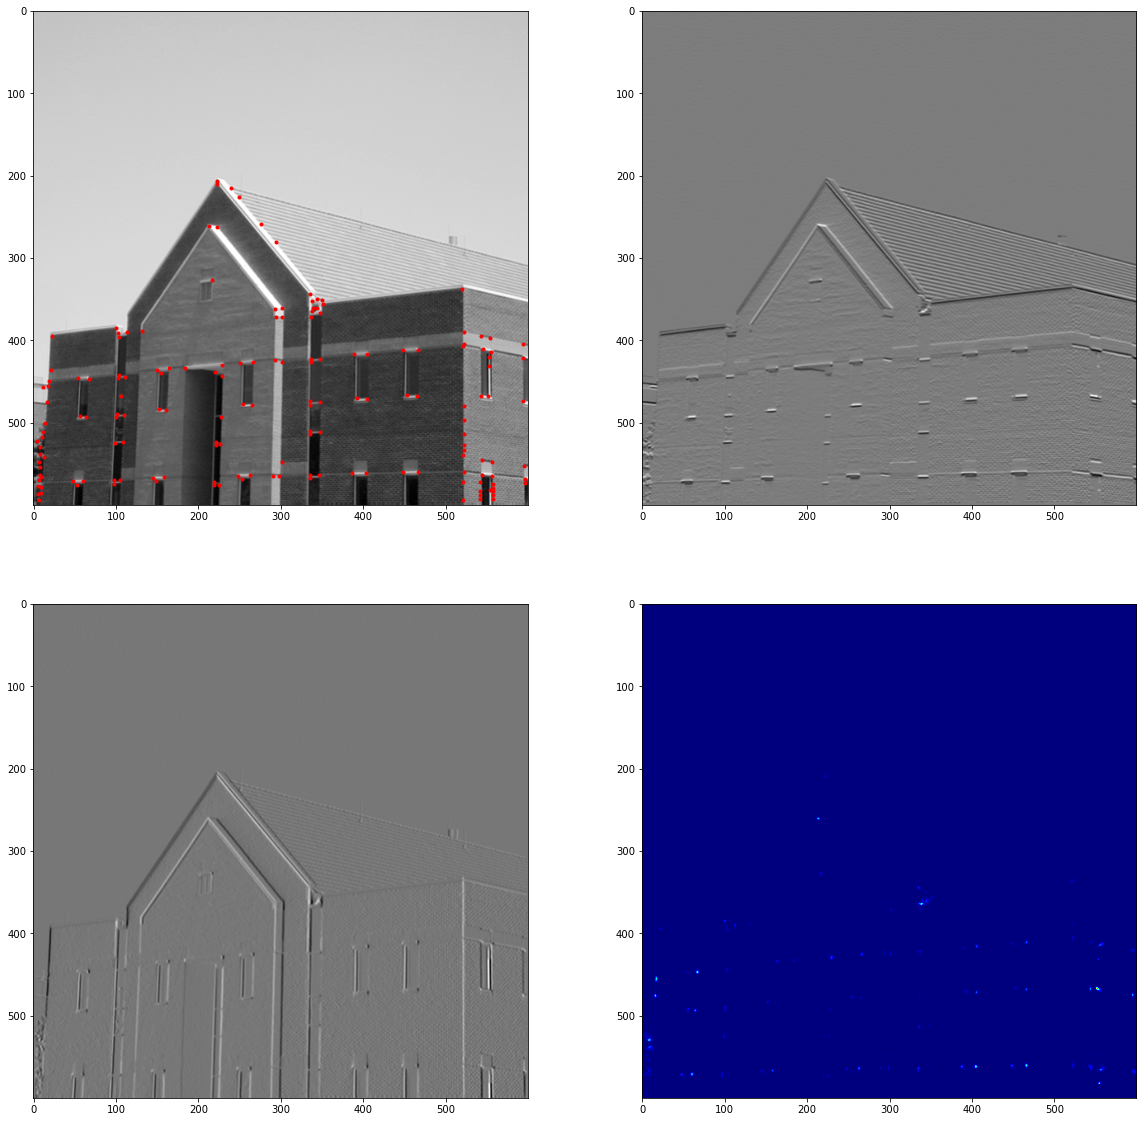

In [18]:
#Q3
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max

im = cv.imread('building.tif', cv. IMREAD_COLOR)
assert im is not None

I = cv.cvtColor(im,cv.COLOR_BGR2GRAY)
I = np.float32(I)
sobel_v = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np. float32)
sobel_h = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np. float32)
Ix = cv. filter2D(I, -1, sobel_v)
Iy = cv.filter2D(I, -1, sobel_h)
sigam = 3
ksize = 7
m11 = cv.GaussianBlur (Ix*Ix, (ksize, ksize), sigma)
m12 = cv.GaussianBlur (Ix*Iy, (ksize, ksize), sigma)
m21 = m12
m22= cv.GaussianBlur (Iy*Iy, (ksize, ksize), sigma)

det = m11*m22 - m12*m21
trace = m11 + m22
alpha = 0.04
R= det - alpha*trace**2

R[R < 1e8] = 0
coordinates = peak_local_max(R, min_distance=2)

fig, ax = plt.subplots (2,2, figsize=(20, 20))
ax[0,0].imshow(im, cmap='gray')
ax[0,0].plot(coordinates [:, 1], coordinates [:, 0], 'r.')
ax[0,1].imshow(Ix + 127, cmap='gray')
ax[1,0].imshow(Iy + 127, cmap='gray')
ax[1,1].imshow(R+ 127, cmap=cm.jet)
plt.show()

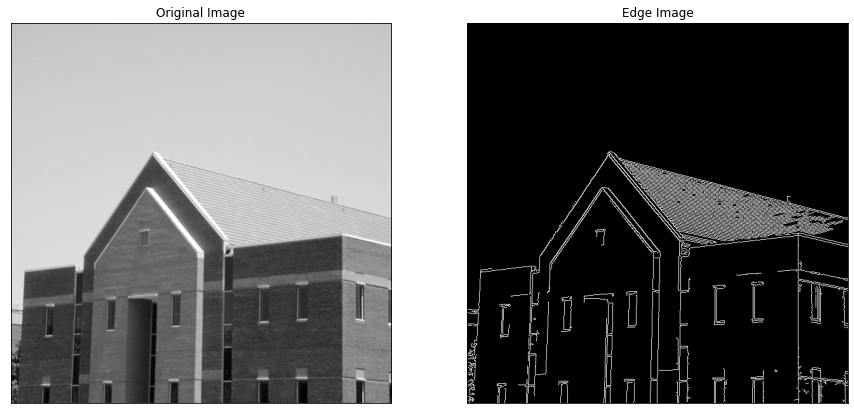

In [9]:
#Q4
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('building.tif',0)
edges = cv.Canny(img,100,200) #image low threshold, high threshold
plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

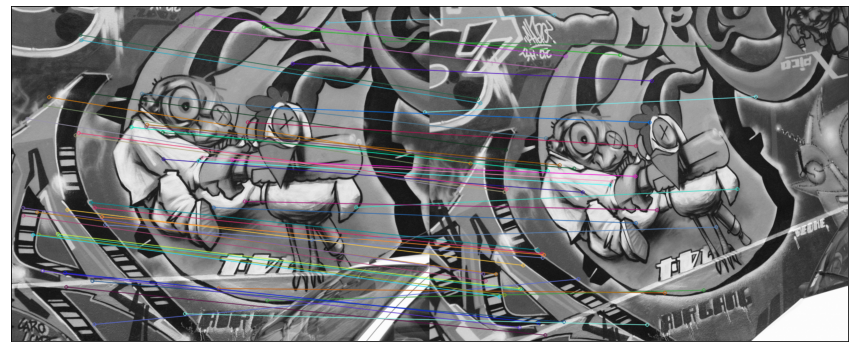

In [8]:
#Q5
import cv2 
import matplotlib.pyplot as plt

img1 = cv2.imread('img1.ppm')  
img2 = cv2.imread('img2.ppm') 

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.figure(figsize=(15,15))
plt.imshow(img3)
plt.xticks([]), plt.yticks([])
plt.show()